# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

# CARGA DEL CONJUNTO DE DATOS

## Descarga de datos


In [9]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [10]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
# !pip install --upgrade --force-reinstall --no-deps kaggle

In [11]:
# from google.colab import files

# # Subir el archivo kaggle.json desde tu sistema local a Google Colab
# uploaded = files.upload()

# # Mover el archivo kaggle.json a la ubicación correcta y establecer permisos
# import shutil
# shutil.move("kaggle.json", "/root/.kaggle/")
# !chmod 600 /root/.kaggle/kaggle.json


In [12]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [13]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
# !kaggle datasets list

In [14]:
# Descargar el dataset
# !kaggle datasets download -d tr1gg3rtrash/yoga-posture-dataset

In [15]:
# Creemos un directorio para descomprimir los datos
# !mkdir my_dataset

## Ejemplo de escritura de datos tomando como referencia un BASE_FOLDER

In [16]:
# Conectamos con nuestro Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
# Establezco una ruta absoluta a un directorio existente de mi Google Drive
# BASE_FOLDER = "/content/drive/MyDrive/Copia de Proyecto_programación"

# BASE_FOLDER = "/content/drive/MyDrive/MASTER_IA/Deep_learning/Proyecto_programación"

BASE_FOLDER= "C:/Users/plane/OneDrive/Escritorio/img_DL_proyect"

In [18]:
# !mkdir $BASE_FOLDER

In [19]:
# !cp yoga-posture-dataset.zip $BASE_FOLDER

In [20]:
# # Descomprimimos
# !cd $BASE_FOLDER
# !unzip yoga-posture-dataset.zip -d $BASE_FOLDER

# INSPECCIONANDO EL CONJUNTO DE DATOS

In [21]:
# Imports necesarios
from imutils import paths
from random import choice
import cv2
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.regularizers import l2, l1

In [22]:
from pathlib import Path
base_folder = Path(BASE_FOLDER)
dataset = {pose.name: len(list(pose.glob('*'))) for pose in base_folder.iterdir() if pose.is_dir()}

from tabulate import tabulate
print(f'Número de categorías: {len(dataset)}, total de ficheros:{sum(dataset.values())}')
table = tabulate(dataset.items(), headers=["Postura", "Número de imágenes"])
print(table)

Número de categorías: 47, total de ficheros:2758
Postura                          Número de imágenes
-----------------------------  --------------------
Adho Mukha Svanasana                             74
Adho Mukha Vrksasana                             65
Alanasana                                        18
Anjaneyasana                                     71
Ardha Chandrasana                                59
Ardha Matsyendrasana                             96
Ardha Navasana                                   13
Ardha Pincha Mayurasana                          54
Ashta Chandrasana                                12
Baddha Konasana                                  81
Bakasana                                         84
Balasana                                         79
Bitilasana                                       94
Camatkarasana                                    62
Dhanurasana                                      54
Eka Pada Rajakapotasana                          53
Garudasana     

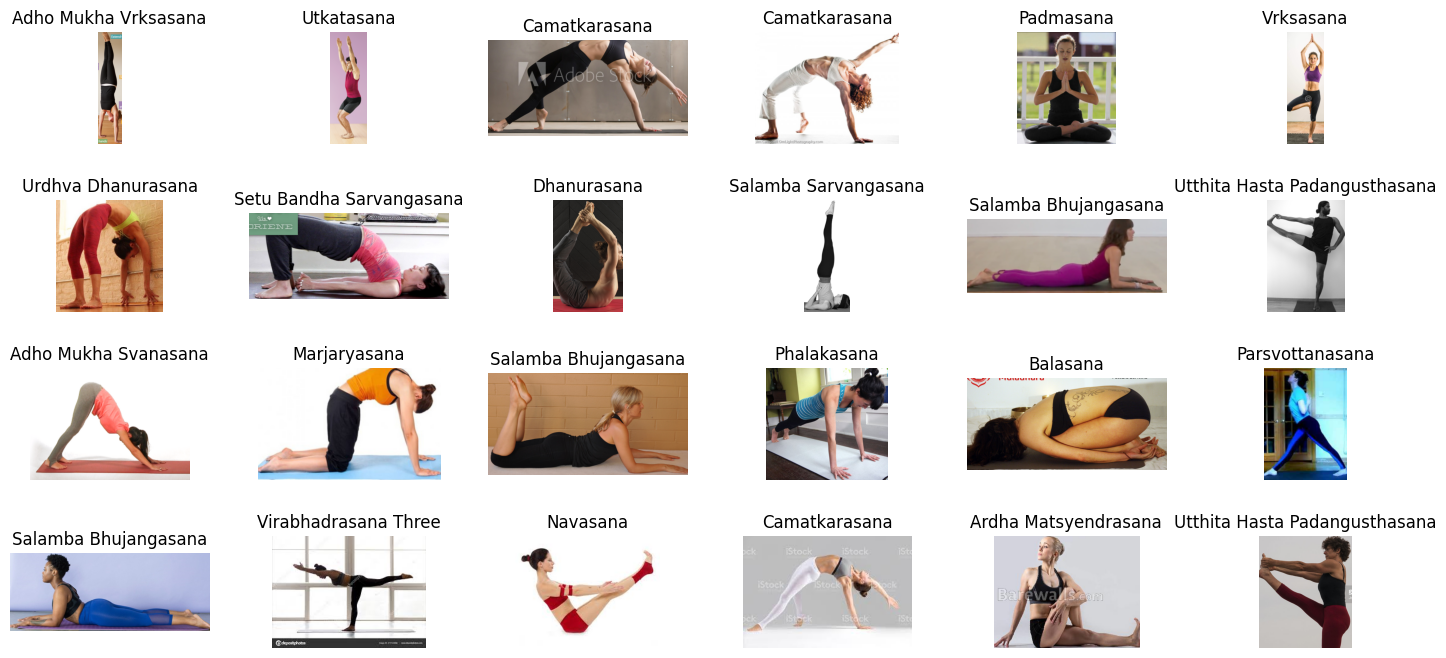

In [23]:
# Crea una lista de rutas de archivo para todas las imágenes en la carpeta base
all_images = list(paths.list_images(BASE_FOLDER))
posible_choices = all_images.copy()

n_rows = 4
n_cols = 6
plt.figure(figsize=(n_cols * 3, n_rows * 2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)

        random_img = choice(posible_choices)
        posible_choices.remove(random_img)

        img = cv2.imread(random_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Agrega esta línea

        plt.imshow(img)
        plt.axis('off')
        plt.title(Path(random_img).parents[0].name)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [24]:
import collections
categories_dict = collections.defaultdict(list)
for path in all_images:
    categories_dict[Path(path).parents[0].name].append(path)
categories_dict = dict(categories_dict)

## estratificación de los datos

Comprobamos como estan balanceados los datos según su etiqueta

In [25]:
image_paths = []
categories = []
for category, paths in categories_dict.items():
  image_paths.extend(paths)
  categories.extend([category] * len(paths))

df = pd.DataFrame({'image_path':image_paths, 'category':categories})
# display(df.head())
numero_de_clases = df['category'].nunique()
nombre_de_clases = df['category'].unique()
print(f'La cantidad de clases a predecir: {numero_de_clases}\n')
print('Los porcentajes de cada clase')

full_strata = (round(df['category'].value_counts(normalize= True)*100, 3)).sort_values(ascending= False)
display(full_strata)

La cantidad de clases a predecir: 47

Los porcentajes de cada clase


category
Ardha Matsyendrasana             3.483
Ustrasana                        3.483
Bitilasana                       3.411
Garudasana                       3.084
Bakasana                         3.048
Utkatasana                       2.939
Baddha Konasana                  2.939
Vasisthasana                     2.903
Balasana                         2.866
Padmasana                        2.794
Adho Mukha Svanasana             2.685
Urdhva Dhanurasana               2.685
Salamba Sarvangasana             2.649
Malasana                         2.649
Uttanasana                       2.576
Anjaneyasana                     2.576
Halasana                         2.576
Utthita Parsvakonasana           2.504
Urdhva Mukha Svsnssana           2.504
Virabhadrasana Three             2.504
Vrksasana                        2.467
Setu Bandha Sarvangasana         2.395
Phalakasana                      2.395
Adho Mukha Vrksasana             2.358
Utthita Hasta Padangusthasana    2.322
Virabhadrasana O

# ACONDICIONAMIENTO DE DATOS

## PARTICION DE LOS DATOS: HOLDOUT SPLIT

In [26]:
from sklearn.model_selection import train_test_split
import cv2

X_path, y = df['image_path'], df['category']

### Problemas con la carga de datos

El siguiente código es muy lento en colab suele tardar unos 40 minutos en cargar todas las imagenes, se utilizara un generator más adelante para no consumir tanta RAM.

El tiempo de carga de 100 imagenes es de 0.5452980995178223 segundos


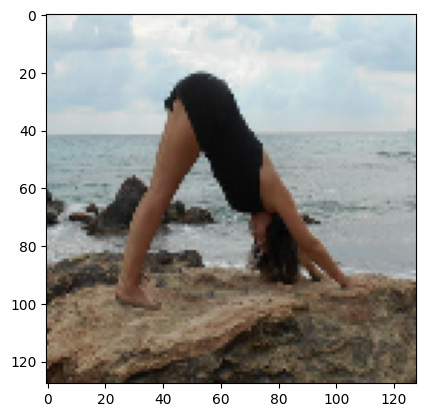

In [27]:
def cargar_imagenes(array_de_paths, image_size= (128, 128)):
  X_img = []
  for path in np.array(array_de_paths):
    img = cv2.imread(path)
    img = cv2.resize(img, image_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = (img.astype(np.float32)/255.0)
    X_img.append(img)
  return np.array(X_img)   # np.array

import time
init_time = time.time()
X_prueba = cargar_imagenes(X_path[:100])
end_time = time.time()
print(f'El tiempo de carga de {len(X_prueba)} imagenes es de {end_time - init_time} segundos')

#print(len(X_path))
import matplotlib.pyplot as plt
plt.imshow(X_prueba[10])
plt.show()

Como cargar todas las imágenes en memoria es muy costoso vamos ha seguir trabajando con los paths de las imagenes en vez de con las imagenes en si.

In [28]:
X = np.array(X_path)
y = np.array(y)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
                                                              shuffle= True,
                                                              stratify=y,
                                                              test_size= 0.2,
                                                              random_state= 42,
                                                              )

print('[INFO]: Comprobando particion externa de datos: ...')
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

[INFO]: Comprobando particion externa de datos: ...
(2204,) (2204,)
(552,) (552,)


### Pasando a One Hot encoding

Aunque realmente lo que voy a coger de aqui es la parte de y_test_ohe, ya que en la parte de train lo convertire a ohe mediante el generador, sin embargo, la parte de test no la toca el generador por lo que conviene pasarla a One hot encoding para la parte de inferencia

In [29]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_ohe = lb.fit_transform(y_train_full)
y_test_ohe = lb.transform(y_test)

print(y_train_full[0])
print(y_test_ohe[0])

Dhanurasana
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


### Comprobando la estratificación de nuestras particiones

In [30]:
# comprobando la estratificación de la muestra
stratified_prove = np.unique(y_train_full, return_counts= True)
split_strata = pd.DataFrame({'category': stratified_prove[0], 'strata_%':(stratified_prove[1]/sum(stratified_prove[1]))*100}).sort_values(by= 'strata_%', ascending = False)

display(split_strata)
coincidencia = sum(split_strata['category'] == full_strata.index)/len(split_strata)
print(f'\nLa estratificación de la particion coincide en un {round(coincidencia*100, 3)}% con la estratificación original')

,category,strata_%
5,Ardha Matsyendrasana,3.493648
37,Ustrasana,3.493648
12,Bitilasana,3.402904
16,Garudasana,3.085299
10,Bakasana,3.039927
38,Utkatasana,2.949183
9,Baddha Konasana,2.949183
42,Vasisthasana,2.903811
11,Balasana,2.858439
22,Padmasana,2.813067



La estratificación de la particion coincide en un 76.596% con la estratificación original


## PARTICION INTERNA DE DATOS

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,
                                                  shuffle= True,
                                                  stratify=y_train_full,
                                                  test_size= 0.1,
                                                  random_state= 42,
                                                  )

print('[INFO]: Comprobando particion externa de datos: ...')
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

[INFO]: Comprobando particion externa de datos: ...
(1983,) (1983,)
(221,) (221,)


In [32]:
df_train = pd.DataFrame({'path_to_img': X_train, 'label': y_train})
df_val = pd.DataFrame({'path_to_img': X_val, 'label': y_val})

# display(df_train.head())
# display(df_val.head())

## CREAMOS UN GENERADOR PERSONALIZADO

En un principio se deseaba implementar esto como una mejora, sin embargo la carga de datos RAW es muy costosa

In [33]:
# Imports necesarios
import tensorflow as tf
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import Sequence, to_categorical

# UN GENERADOR DE DATOS PROPIO
class DataGenerator(tf.keras.utils.Sequence):

    # EL CONSTRUCTOR
    def __init__(self, dataframe,
                 image_path_col = 'path_to_img',
                 label_col = 'label',
                 batch_size = 128,
                 image_size = (128, 128),
                 shuffle=True, *args, **kwargs):

        self.dataframe = dataframe                                            # El DataFrame de pandas que contiene los datos.
        self.image_paths = dataframe[image_path_col].tolist()                 # Lista de rutas de imágenes.
        self.labels = dataframe[label_col].values                             # Array con las etiquetas.
        num_classes = len(dataframe[label_col].unique())                      # Número de clases únicas.
        self.label_encoder = LabelEncoder()                                   # Encoder para las etiquetas.
        self.label_encodings = self.label_encoder.fit_transform(self.labels)  # Etiquetas transformadas a valores numéricos.
        self.labels_ohe = to_categorical(self.label_encodings, num_classes)   # Etiquetas codificadas en formato one-hot.
        self.batch_size = batch_size                                          # Tamaño del lote (batch).
        self.image_size = image_size                                          # Tamaño de las imágenes a ajustar.
        self.shuffle = shuffle                                                # Si los datos se deben barajar o no.
        self.indexes = np.arange(len(self.image_paths))                       # Índices para acceder a los elementos.

        if self.shuffle:
            np.random.shuffle(self.indexes)                                   # Baraja los índices si shuffle es True.


    # DEVUELVE EL NÚMERO DEL BATCHES POR EPOCA # METODO PRIVADO
    def __len__(self):
        return int(np.ceil(len(self.indexes)/self.batch_size))

    # SE HACE UN SHUFFLE AL FINAL DE CADA ÉPOCA
    def on_epoch_end(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    # PARA OBTENER LA ETIQUETA DADO UN VECTOR OHE
    def get_label(self, label_ohe):
        return self.label_encoder.inverse_transform([label_ohe])[0]

    # CARGAR LAS IMAGENES Y PREPROCESARLAS
    def _load_preprocess_img(self, img_path):
        image = cv2.imread(img_path)                                         # Carga la imagen.
        image = cv2.resize(image, (self.image_size[1], self.image_size[0]))  # Redimensiona la imagen.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                       # Convierte de BGR a RGB.
        image = image.astype('float32')                                      # Cambia el tipo a float32.
        image = image/255.0                                                  # Normaliza la imagen.
        return image

    # OBTENER UN BATCH A PARTIR DE UNA POSICION INDEX # METODO PRIVADO
    def __getitem__(self, index):
        start_idx = index * self.batch_size                                  # Índice de inicio del lote.
        end_idx = (index + 1) * self.batch_size                              # Índice de fin del lote.

        batch_indexes = self.indexes[start_idx:end_idx]                                            # Índices del lote.
        batch_images = [self._load_preprocess_img(self.image_paths[i]) for i in batch_indexes]     # Rutas de las imágenes del lote.
        batch_labels = [self.labels_ohe[i] for i in batch_indexes]                                 # Etiquetas del lote.

        return np.array(batch_images), np.array(batch_labels) # Devuelve el lote de imágenes y etiquetas.



# ESTRATEGIA FROM SCRATCH: DESARROLLANDO DIFERENTES ARQUIETECTURAS Y ENTRENANDOLAS



## ARQUITECTURA 1

En este primer ejemplo se mostrarán todos los pasos desglosados, pero en las siguientes el código estará más comprimido

### CREANDO EL MODELO

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import random
from tensorflow.random import set_seed

set_seed(42)

from functools import partial

DefaultConv2D = partial(layers.Conv2D,
                        kernel_size= 3,
                        padding= 'same',
                        activation= 'relu',
                        kernel_initializer = 'he_normal')
cnn_1 = Sequential([

    # BASE MODEL
    # bloque convolucional 1
    DefaultConv2D(filters= 64, input_shape= [128, 128, 3]),
    layers.MaxPool2D(pool_size= 2),

    # bloque convolucional 2
    DefaultConv2D(filters= 128),
    layers.MaxPool2D(pool_size= 2),

    # bloque convolucional 3
    DefaultConv2D(filters= 256),
    layers.MaxPool2D(pool_size= 2),

    # BASE MODEL
    layers.Flatten(),
    layers.Dense(512, activation= 'relu', kernel_initializer= 'he_normal'),
    layers.Dropout(0.3),
    layers.Dense(256, activation= 'relu', kernel_initializer= 'he_normal'),
    layers.Dropout(0.3),
    layers.Dense(128, activation= 'relu', kernel_initializer= 'he_normal'),
    layers.Dropout(0.3),
    layers.Dense(47, activation= 'softmax')

])

cnn_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 256)     

### COMPILANDO EL MODELO

In [40]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate= 0.0001)

cnn_1.compile(optimizer= optimizer,
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

### ENTRENANDO EL MODELO

#### Hiperparametros del entrenamiento

In [41]:
batch_size = 128
img_size = (128, 128)
epochs = 60

#### Creando el flow de datos para entrenamiento y validacion

In [42]:
train_data_flow = DataGenerator(dataframe= df_train,
                                image_path_col= 'path_to_img',
                                label_col = 'label',
                                batch_size= batch_size,
                                image_size= img_size,
                                )

val_data_flow = DataGenerator(dataframe= df_val,
                              image_path_col= 'path_to_img',
                              label_col = 'label',
                              batch_size= batch_size,
                              image_size= img_size,
                              )

In [43]:
from tensorflow.random import set_seed

set_seed(42)
H = cnn_1.fit(train_data_flow,
              epochs = epochs,
              batch_size= batch_size,
              validation_data= val_data_flow)

cnn_1.save(BASE_FOLDER+"CNN_scrath_01.h5")

Epoch 1/60
16/16 [==============================] - 14s 757ms/step - loss: 4.7233 - accuracy: 0.0156 - val_loss: 3.8427 - val_accuracy: 0.0226
Epoch 2/60
16/16 [==============================] - 10s 592ms/step - loss: 3.8628 - accuracy: 0.0232 - val_loss: 3.8344 - val_accuracy: 0.0362
Epoch 3/60
16/16 [==============================] - 10s 625ms/step - loss: 3.8353 - accuracy: 0.0358 - val_loss: 3.8241 - val_accuracy: 0.0452
Epoch 4/60
16/16 [==============================] - 10s 598ms/step - loss: 3.8270 - accuracy: 0.0343 - val_loss: 3.8132 - val_accuracy: 0.0543
Epoch 5/60
16/16 [==============================] - 10s 625ms/step - loss: 3.8099 - accuracy: 0.0424 - val_loss: 3.7810 - val_accuracy: 0.0679
Epoch 6/60
16/16 [==============================] - 9s 559ms/step - loss: 3.7765 - accuracy: 0.0464 - val_loss: 3.7471 - val_accuracy: 0.0498
Epoch 7/60
16/16 [==============================] - 9s 593ms/step - loss: 3.7462 - accuracy: 0.0630 - val_loss: 3.7196 - val_accuracy: 0.0769
E

### LEARNING CURVE

In [44]:

def learning_curve(history, epochs= epochs):

  import matplotlib.pyplot as plt
  import pandas as pd

  h_dict = history.history
  pd.DataFrame(h_dict).plot(figsize=(12, 7),
                            xlim= [0, epochs], ylim= [0, max(h_dict['val_loss'])+0.3],
                            grid= True,
                            xlabel= 'Epochs', ylabel= 'Loss - accuracy',
                            style= ['r--', 'y-*', 'b-', 'g-*'])
  plt.legend(loc= 'best')
  plt.title('Loss and accuracy of the model')
  plt.show()

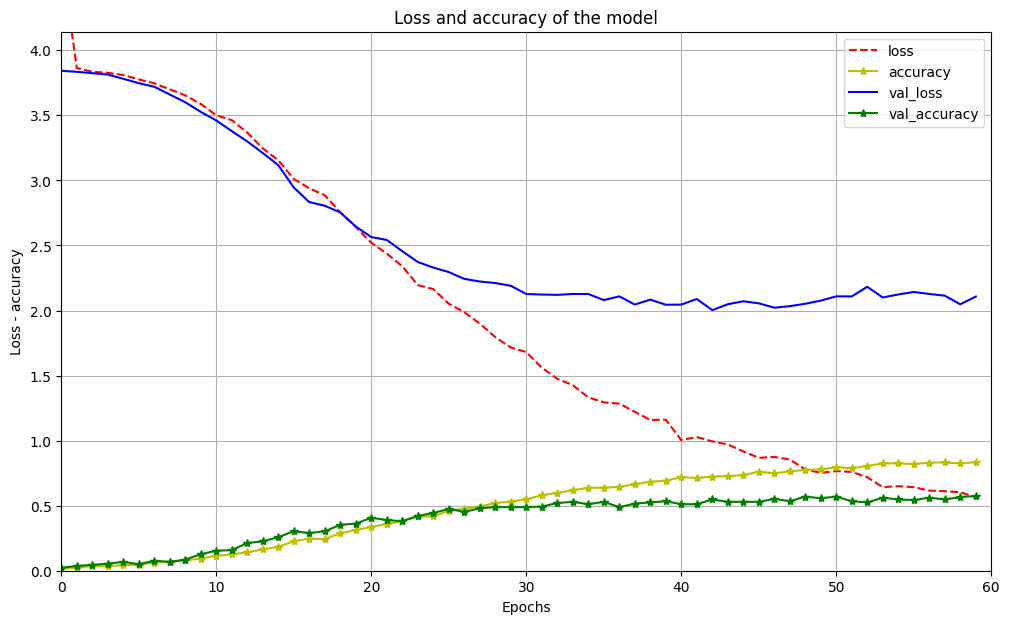

In [45]:
learning_curve(H)   # claro ejemplo de overfitting

In [46]:
# Ahora cargamos los imagenes de X_test
X_test_loaded = cargar_imagenes(X_test)

In [47]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = cnn_1.predict(X_test_loaded, batch_size=128)
print('\nComprobamos que las etiquetas y las predicciones estan en el mismo formato:')
print(y_test_ohe.argmax(axis= 1)[:10])
print(predictions.argmax(axis= 1)[:10])
print('\n')
print(classification_report(y_test_ohe.argmax(axis= 1), predictions.argmax(axis=1), target_names=nombre_de_clases))

[INFO]: Evaluando red neuronal...
5/5 [==============================] - 1s 223ms/step

Comprobamos que las etiquetas y las predicciones estan en el mismo formato:
[ 0 33 46 44 45 26 40 19 13 29]
[ 0 38 16  4 45 14 40 19 13 27]


                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.54      0.47      0.50        15
         Adho Mukha Vrksasana       0.56      0.38      0.45        13
                    Alanasana       0.00      0.00      0.00         4
                 Anjaneyasana       0.71      0.36      0.48        14
            Ardha Chandrasana       0.83      0.42      0.56        12
         Ardha Matsyendrasana       0.60      0.63      0.62        19
               Ardha Navasana       0.00      0.00      0.00         2
      Ardha Pincha Mayurasana       0.40      0.36      0.38        11
            Ashta Chandrasana       0.00      0.00      0.00         2
              Baddha Konasana       0.50      0.50      0.5

c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

### RESULTADOS Y BENCHMARK INICIAL

Bien!, con nuestra primera CNN conseguimos un accuracy del 63%, en test, teniendo en cuenta que hay más de 47 clases y de cada una la cantidad porcentual en todo el  dataset no supera el 4% (lo que lograría un dummy clasifier), se puede tomar como un buen resultado. Sin embargo, a priori, es muy mejorable.

## ARQUITECTURA 2: Intentando reducir el overfitting

La segunda arquitectura que vamos a probar tendrá algunos extras, y algunas simplificaciones:

- Se elimina una capa densa con el objetivo de no sobre ajustar tanto a los datos de entrenamiento.
- Se añade regularización con un alpha de 0.01.
- Tras todas las capas se añade batch normalization para normalizar la salida de cada capa. Además se aplicará antes de la activación como recomendaban los autores de misma técnica, y se pone el término bias a false ya que lo añade el propio método.
- LeakyRelu como activación en las capas convolucionales.
- Se añadirá DataAumentation para reducir el overfitting
- Añadira un learning_rate scheduler que nos permitirá empezar con un learning rate más alto y después este irá decayendo
- mas, mas, mas ...

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.random import set_seed

set_seed(42)

from functools import partial

DefaultConv2D = partial(layers.Conv2D,
                        kernel_size= 3,
                        padding= 'same',
                        kernel_initializer = 'he_normal',
                        use_bias= False,
                        kernel_regularizer= tf.keras.regularizers.l2(0.01))

RegularizedDense= partial(tf.keras.layers.Dense,
                          kernel_initializer= 'he_normal',
                          kernel_regularizer= tf.keras.regularizers.l2(0.01),
                          use_bias= False)

cnn_2 = Sequential([

    # BASE MODEL
    # bloque convolucional 1
    DefaultConv2D(filters= 64, kernel_size= 5, input_shape=[128, 128, 3]),
    layers.BatchNormalization(),              # BN1 - CONV
    layers.LeakyReLU(alpha= 0.2),             # Activation 1 CONV
    layers.MaxPool2D(pool_size= 2),           # MaxPool 1

    # bloque convolucional 2
    DefaultConv2D(filters= 128),
    layers.BatchNormalization(),              # BN1 - CONV
    layers.LeakyReLU(alpha= 0.2),             # Activation 2 CONV
    layers.MaxPool2D(pool_size= 2),           # MaxPool 2

    # bloque convolucional 3
    DefaultConv2D(filters= 256),
    layers.BatchNormalization(),              # BN3 - CONV
    layers.LeakyReLU(alpha= 0.2),             # Activation 3 CONV
    layers.MaxPool2D(pool_size= 2),           # MaxPool 3

    # BASE MODEL
    #layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    RegularizedDense(64),                     # Dense 1
    layers.BatchNormalization(),              # BN1
    layers.Activation('relu'),                # activation 1
    layers.Dropout(0.25),                     # dropout 1
    RegularizedDense(64),                     # Dense 2
    layers.BatchNormalization(),              # BN 2
    layers.Activation('relu'),                # activation 2
    layers.Dropout(0.25),                     # dropout 2
    layers.Dense(47, activation= 'softmax')   # output layer

])

cnn_2.summary()

from tensorflow.keras.optimizers import Adam

lr = 0.0008
optimizer = Adam(learning_rate= lr, beta_1= 0.9)

cnn_2.compile(optimizer= optimizer,
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 64)      4800      
                                                                 
 batch_normalization_10 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 128)       73728     
                                                                 
 batch_normalization_11 (Bat  (None, 64, 64, 128)     

### IMPLEMENTANDO DATA AUMENTATION

Al igual que antes Creamos un  generador personalizado

In [57]:
# Imports necesarios
import tensorflow as tf
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import Sequence, to_categorical

# UN GENERADOR DE DATOS PROPIO
class DataGeneratorAumented(tf.keras.utils.Sequence):

    # EL CONSTRUCTOR
    def __init__(self, dataframe, datagen,
                 image_path_col = 'path_to_img',
                 label_col = 'label',
                 batch_size = 128,
                 image_size = (128, 128),
                 shuffle=True,
                 *args, **kwargs):

        self.dataframe = dataframe                                            # El DataFrame de pandas que contiene los datos.
        self.datagen = datagen
        self.image_paths = dataframe[image_path_col].tolist()                 # Lista de rutas de imágenes.
        self.labels = dataframe[label_col].values                             # Array con las etiquetas.
        num_classes = len(dataframe[label_col].unique())                      # Número de clases únicas.
        self.label_encoder = LabelEncoder()                                   # Encoder para las etiquetas.
        self.label_encodings = self.label_encoder.fit_transform(self.labels)  # Etiquetas transformadas a valores numéricos.
        self.labels_ohe = to_categorical(self.label_encodings, num_classes)   # Etiquetas codificadas en formato one-hot.
        self.batch_size = batch_size                                          # Tamaño del lote (batch).
        self.image_size = image_size                                          # Tamaño de las imágenes a ajustar.
        self.shuffle = shuffle                                                # Si los datos se deben barajar o no.
        self.indexes = np.arange(len(self.image_paths))                       # Índices para acceder a los elementos.

        if self.shuffle:
            np.random.shuffle(self.indexes)                                   # Baraja los índices si shuffle es True.


    # DEVUELVE EL NÚMERO DEL BATCHES POR EPOCA # METODO PRIVADO
    def __len__(self):
        return int(np.ceil(len(self.indexes)/self.batch_size))

    # SE HACE UN SHUFFLE AL FINAL DE CADA ÉPOCA
    def on_epoch_end(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    # PARA OBTENER LA ETIQUETA DADO UN VECTOR OHE
    def get_label(self, label_ohe):
        return self.label_encoder.inverse_transform([label_ohe])[0]

    # CARGAR LAS IMAGENES Y PREPROCESARLAS
    def _load_preprocess_img(self, img_path):
        image = cv2.imread(img_path)                                         # Carga la imagen.
        image = cv2.resize(image, (self.image_size[1], self.image_size[0]))  # Redimensiona la imagen.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                       # Convierte de BGR a RGB.
        image = self.datagen.random_transform(image)                         # aplica las transformaciones del datagen
        image = image.astype('float32')                                      # Cambia el tipo a float32.
        image = image/255.0                                                  # Normaliza la imagen.
        return image

    # OBTENER UN BATCH A PARTIR DE UNA POSICION INDEX # METODO PRIVADO
    def __getitem__(self, index):
        start_idx = index * self.batch_size                                  # Índice de inicio del lote.
        end_idx = (index + 1) * self.batch_size                              # Índice de fin del lote.

        batch_indexes = self.indexes[start_idx:end_idx]                                            # Índices del lote.
        batch_images = [self._load_preprocess_img(self.image_paths[i]) for i in batch_indexes]     # Rutas de las imágenes del lote.
        batch_labels = [self.labels_ohe[i] for i in batch_indexes]                                 # Etiquetas del lote.

        return np.array(batch_images), np.array(batch_labels) # Devuelve el lote de imágenes y etique

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,             # invariabilidad a orientación de objetos
    width_shift_range=0.1,         # traslacion horizontalmente en un 20%
    height_shift_range=0.1,        # traslación vertical en un 20%
    horizontal_flip=True,          # aplica simetria horizontal
    shear_range=0,                 # para variaciones de perspectiva
    zoom_range=0.2,                # rango de zoom aleatorio de 20%
    fill_mode='nearest',           # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2        # cambios aleatorios en los canales
)


batch_size = 128
img_size = (128, 128)
epochs = 100

train_data_flow_aumented = DataGeneratorAumented(
                                dataframe= df_train,
                                datagen = datagen,
                                image_path_col= 'path_to_img',
                                label_col = 'label',
                                batch_size= batch_size,
                                image_size= img_size,
                                )

val_data_flow = DataGenerator(dataframe= df_val,
                              image_path_col= 'path_to_img',
                              label_col = 'label',
                              batch_size= batch_size,
                              image_size= img_size,
                              )



### Definimos los callbacks

- Learning rate scheduler

- Early stopping

In [59]:
# learrning rate scheduler: PERFORMACE SCHEDULE
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(

    factor= 0.5,
    patience= 3,
    monitor= 'val_loss',
    min_lr= 0.000025
    )

# Early stopping

early_stop = tf.keras.callbacks.EarlyStopping(

    monitor="val_loss",
    patience=10,
    mode="auto",
    verbose= 1,
    restore_best_weights=True,
    #start_from_epoch=0,
    )


### Entrenamos y evaluamos los resultados

Epoch 1/100
16/16 [==============================] - 18s 1s/step - loss: 14.9631 - accuracy: 0.0454 - val_loss: 17.5638 - val_accuracy: 0.0317 - lr: 8.0000e-04
Epoch 2/100
16/16 [==============================] - 16s 971ms/step - loss: 12.7412 - accuracy: 0.0797 - val_loss: 11.7002 - val_accuracy: 0.0543 - lr: 8.0000e-04
Epoch 3/100
16/16 [==============================] - 16s 974ms/step - loss: 10.6775 - accuracy: 0.1004 - val_loss: 9.9387 - val_accuracy: 0.0814 - lr: 8.0000e-04
Epoch 4/100
16/16 [==============================] - 16s 966ms/step - loss: 9.0204 - accuracy: 0.1392 - val_loss: 8.6470 - val_accuracy: 0.0905 - lr: 8.0000e-04
Epoch 5/100
16/16 [==============================] - 16s 968ms/step - loss: 7.8757 - accuracy: 0.1467 - val_loss: 7.7823 - val_accuracy: 0.0452 - lr: 8.0000e-04
Epoch 6/100
16/16 [==============================] - 16s 1s/step - loss: 6.9835 - accuracy: 0.1866 - val_loss: 7.0757 - val_accuracy: 0.0860 - lr: 8.0000e-04
Epoch 7/100
16/16 [================

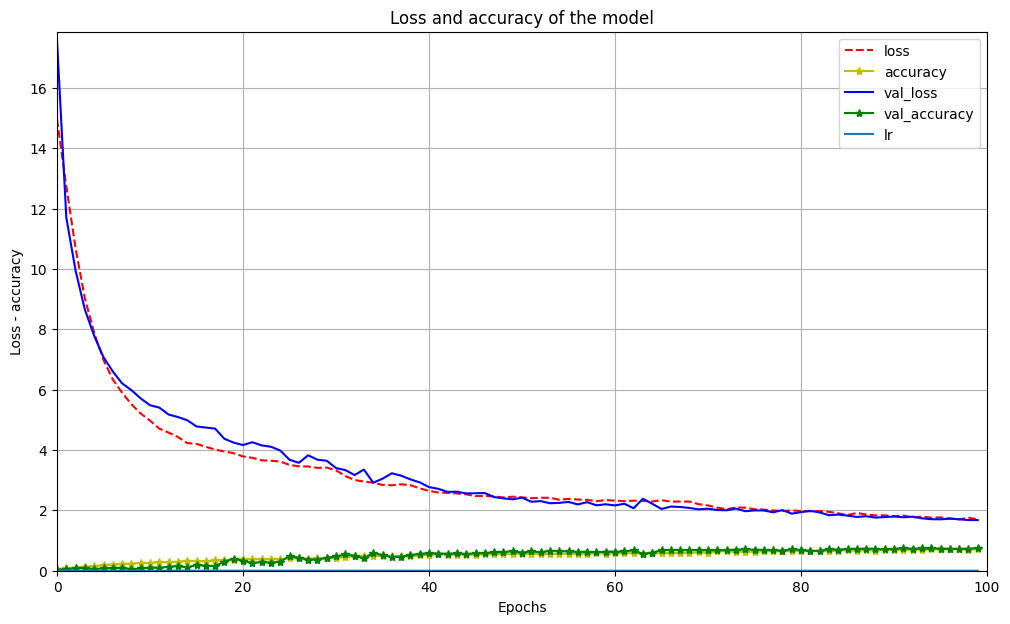

In [60]:
H_2 = cnn_2.fit(train_data_flow_aumented,
                  batch_size = batch_size,
                  epochs=epochs,
                  validation_data=val_data_flow,
                  callbacks= [lr_scheduler, early_stop])

# Almacenamos el modelo empleando la función mdoel.save de Keras
# cnn_2.save(BASE_FOLDER+"CNN_scrath_aug_01.h5")

learning_curve(H_2, epochs= 100)

In [ ]:
# Ahora cargamos los imagenes de X_test
# X_test_loaded = cargar_imagenes(X_test)

In [61]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = cnn_2.predict(X_test_loaded, batch_size=128)
print('\n')
print(classification_report(y_test_ohe.argmax(axis= 1), predictions.argmax(axis=1), target_names=nombre_de_clases))

[INFO]: Evaluando red neuronal...
5/5 [==============================] - 1s 140ms/step


                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.69      0.73      0.71        15
         Adho Mukha Vrksasana       0.64      0.69      0.67        13
                    Alanasana       1.00      0.25      0.40         4
                 Anjaneyasana       0.69      0.64      0.67        14
            Ardha Chandrasana       0.65      0.92      0.76        12
         Ardha Matsyendrasana       0.76      0.84      0.80        19
               Ardha Navasana       0.00      0.00      0.00         2
      Ardha Pincha Mayurasana       0.80      0.73      0.76        11
            Ashta Chandrasana       0.00      0.00      0.00         2
              Baddha Konasana       0.88      0.94      0.91        16
                     Bakasana       0.92      0.71      0.80        17
                     Balasana       0.69      0.56      0.

c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

# Resultados de nuestra red "From scratch"

Bien con nuestra primera red conseguiamos una accuracy en test del 63%. Implementandole algunas mejoras y simplificandola en algunos aspectos, hemos conseguido un accuracy del 72% test. ¡Nada mal!

¿ se podría seguir mejorando ? sí pero por el alcance del proyecto pasaremos al transfer learning y al fine tunning.

# Transfer learning

In [63]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(
    include_top = False,          # no incluimos el top model
    weights= 'imagenet',          # pesos del pre entrenamiento con imagenet
    input_shape= (128, 128, 3)      # tamaño de las imagenes y sus canales
    )

base_model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,             # invariabilidad a orientación de objetos
    width_shift_range=0.1,         # traslacion horizontalmente en un 20%
    height_shift_range=0.1,        # traslación vertical en un 20%
    horizontal_flip=True,          # aplica simetria horizontal
    shear_range=0,                 # para variaciones de perspectiva
    zoom_range=0.2,                # rango de zoom aleatorio de 20%
    fill_mode='nearest',           # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2        # cambios aleatorios en los canales
)


batch_size = 128
img_size = (128, 128)
epochs = 40

train_data_flow_aumented = DataGeneratorAumented(
                                dataframe= df_train,
                                datagen = datagen,
                                image_path_col= 'path_to_img',
                                label_col = 'label',
                                batch_size= batch_size,
                                image_size= img_size,
                                )

val_data_flow = DataGenerator(dataframe= df_val,
                              image_path_col= 'path_to_img',
                              label_col = 'label',
                              batch_size= batch_size,
                              image_size= img_size,
                              )

In [65]:
from functools import partial
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

RegularizedDense= partial(tf.keras.layers.Dense,
                          kernel_initializer= 'he_normal',
                          kernel_regularizer= tf.keras.regularizers.l2(0.005),
                          use_bias= False)

# Evitar que los pesos se modifiquen en la CNN -> TRANSFER LEARNING
base_model.trainable = False

pre_trained_model = Sequential([

    base_model,
    layers.Flatten(),
    RegularizedDense(470),                   # Dense 1 10 x 47
    layers.BatchNormalization(),             # BN1
    layers.Activation('relu'),               # activation 1
    layers.Dropout(0.5),                     # dropout 1
    RegularizedDense(235),                   # Dense 2 4 x 47
    layers.BatchNormalization(),             # BN 2
    layers.Activation('relu'),               # activation 2
    layers.Dropout(0.5),                     # dropout 2
    layers.Dense(47, activation= 'softmax')  # output layer 47 clases

])

pre_trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 20480)             0         
                                                                 
 dense_17 (Dense)            (None, 470)               9625600   
                                                                 
 batch_normalization_15 (Bat  (None, 470)              1880      
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 470)               0         
                                                                 
 dropout_12 (Dropout)        (None, 470)              

Epoch 1/40
16/16 [==============================] - 22s 1s/step - loss: 11.1232 - accuracy: 0.0595 - val_loss: 10.0589 - val_accuracy: 0.2308 - lr: 2.0000e-04
Epoch 2/40
16/16 [==============================] - 16s 992ms/step - loss: 10.0486 - accuracy: 0.1926 - val_loss: 9.0309 - val_accuracy: 0.4118 - lr: 2.0000e-04
Epoch 3/40
16/16 [==============================] - 17s 1s/step - loss: 9.4915 - accuracy: 0.2789 - val_loss: 8.4597 - val_accuracy: 0.5204 - lr: 2.0000e-04
Epoch 4/40
16/16 [==============================] - 16s 1s/step - loss: 8.9587 - accuracy: 0.3833 - val_loss: 8.0967 - val_accuracy: 0.5882 - lr: 2.0000e-04
Epoch 5/40
16/16 [==============================] - 16s 994ms/step - loss: 8.5592 - accuracy: 0.4574 - val_loss: 7.8311 - val_accuracy: 0.6109 - lr: 2.0000e-04
Epoch 6/40
16/16 [==============================] - 16s 992ms/step - loss: 8.2474 - accuracy: 0.4987 - val_loss: 7.5899 - val_accuracy: 0.6471 - lr: 2.0000e-04
Epoch 7/40
16/16 [============================

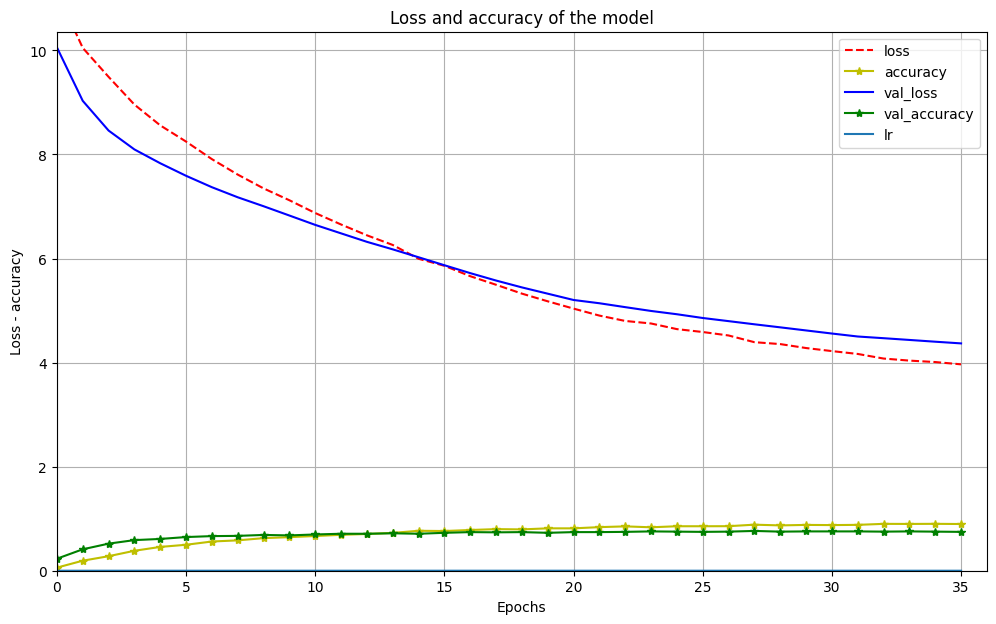

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed

set_seed(42)

opt = Adam(learning_rate= 0.0002, beta_1= 0.9)

pre_trained_model.compile(loss="categorical_crossentropy",
                          optimizer=opt,
                          metrics=["accuracy"])



# learrning rate scheduler: PERFORMACE SCHEDULE

# monitorea la perdida de validacion
lr_scheduler_val_loss = tf.keras.callbacks.ReduceLROnPlateau(

    factor= 0.5,
    patience= 1,
    monitor= 'val_loss',
    min_lr= 0.00001
    )

# monitorea el accuracy de validación
lr_scheduler_val_acc = tf.keras.callbacks.ReduceLROnPlateau(

    factor= 0.5,
    patience= 4,
    monitor= 'val_accuracy',
    min_lr= 0.00001
    )


# Early stopping

# monitorea la perdida de validación
early_stop_val_loss = tf.keras.callbacks.EarlyStopping(

    monitor="val_loss",
    patience=3,
    mode="auto",
    verbose= 1,
    restore_best_weights=True,
    #start_from_epoch=0,
    )

# monitorea el accuracy de validación
early_stop_val_acc = tf.keras.callbacks.EarlyStopping(

    monitor="val_accuracy",
    patience=8,
    mode="auto",
    verbose= 1,
    restore_best_weights=True,
    #start_from_epoch=0,
    )


# entrenamos el modelo
H_TF = pre_trained_model.fit(
      train_data_flow_aumented,
      epochs= epochs,
      batch_size= batch_size,
      validation_data=val_data_flow,
      callbacks= [lr_scheduler_val_loss, lr_scheduler_val_acc, early_stop_val_loss, early_stop_val_acc])

learning_curve(H_TF, epochs = len(H_TF.history['loss']))

In [68]:
# pre_trained_model.save(BASE_FOLDER+"Movilenet_aug_02.h5")

In [69]:
# Ahora cargamos los imagenes de X_test
# X_test_loaded = cargar_imagenes(X_test)

In [70]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = pre_trained_model.predict(X_test_loaded, batch_size=64)
print('\n')
print(classification_report(y_test_ohe.argmax(axis= 1), predictions.argmax(axis=1), target_names=nombre_de_clases))

[INFO]: Evaluando red neuronal...
9/9 [==============================] - 2s 64ms/step


                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.53      0.67      0.59        15
         Adho Mukha Vrksasana       0.73      0.62      0.67        13
                    Alanasana       0.00      0.00      0.00         4
                 Anjaneyasana       0.60      0.64      0.62        14
            Ardha Chandrasana       1.00      0.92      0.96        12
         Ardha Matsyendrasana       0.82      0.95      0.88        19
               Ardha Navasana       0.00      0.00      0.00         2
      Ardha Pincha Mayurasana       0.36      0.36      0.36        11
            Ashta Chandrasana       0.00      0.00      0.00         2
              Baddha Konasana       0.81      0.81      0.81        16
                     Bakasana       1.00      0.88      0.94        17
                     Balasana       0.79      0.94      0.8

c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

## Evaluando resultados

Con el transfer learnig conseguimos subir de 72% a 78% en inferencia, para ello se han aplicado técnicas para reducción del overfitting como:

- Dropout
- Data aumentation
- Batch normalization
- Regularización l2
- 4 callbacks 2 para early stopping y 2 para un performance scheduling del learning rate, cada uno monitoreando el accuracy y la pérdida de validacion.

# FINE TUNING

In [71]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(
    include_top = False,            # no incluimos el top model
    weights= 'imagenet',            # pesos del pre entrenamiento con imagenet
    input_shape= (128, 128, 3)      # tamaño de las imagenes y sus canales
    )

base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [85]:
# VOY A DESCONGELAR LAS ÚLTIMAS DOS CAPAS CONVOLUCIONALES
unfreeze = False
for layer in base_model.layers:
    if layer.name == 'block_14_expand':
        unfreeze = True
    layer.trainable = unfreeze
    print('Capa ' + layer.name + (' descongelada.' if unfreeze else ' congelada...'))


from functools import partial
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

RegularizedDense= partial(tf.keras.layers.Dense,
                          kernel_initializer= 'he_normal',
                          kernel_regularizer= tf.keras.regularizers.l2(0.005),
                          use_bias= False)



fine_tuned_model = Sequential([

    base_model,
    layers.Flatten(),
    #layers.GlobalAveragePooling2D(),
    RegularizedDense(470),                   # Dense 1 10 x 47
    layers.BatchNormalization(),             # BN1
    layers.Activation('relu'),               # activation 1
    layers.Dropout(0.5),                     # dropout 1
    RegularizedDense(235),                   # Dense 2 4 x 47
    layers.BatchNormalization(),             # BN 2
    layers.Activation('relu'),               # activation 2
    layers.Dropout(0.5),                     # dropout 2
    layers.Dense(47, activation= 'softmax')  # output layer 47 clases

])

fine_tuned_model.summary()

Capa input_2 congelada...
Capa Conv1 congelada...
Capa bn_Conv1 congelada...
Capa Conv1_relu congelada...
Capa expanded_conv_depthwise congelada...
Capa expanded_conv_depthwise_BN congelada...
Capa expanded_conv_depthwise_relu congelada...
Capa expanded_conv_project congelada...
Capa expanded_conv_project_BN congelada...
Capa block_1_expand congelada...
Capa block_1_expand_BN congelada...
Capa block_1_expand_relu congelada...
Capa block_1_pad congelada...
Capa block_1_depthwise congelada...
Capa block_1_depthwise_BN congelada...
Capa block_1_depthwise_relu congelada...
Capa block_1_project congelada...
Capa block_1_project_BN congelada...
Capa block_2_expand congelada...
Capa block_2_expand_BN congelada...
Capa block_2_expand_relu congelada...
Capa block_2_depthwise congelada...
Capa block_2_depthwise_BN congelada...
Capa block_2_depthwise_relu congelada...
Capa block_2_project congelada...
Capa block_2_project_BN congelada...
Capa block_2_add congelada...
Capa block_3_expand congelada

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,             # invariabilidad a orientación de objetos
    width_shift_range=0.1,         # traslacion horizontalmente en un 20%
    height_shift_range=0.1,        # traslación vertical en un 20%
    horizontal_flip=True,          # aplica simetria horizontal
    shear_range=0,                 # para variaciones de perspectiva
    zoom_range=0.2,                # rango de zoom aleatorio de 20%
    fill_mode='nearest',           # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2        # cambios aleatorios en los canales
)


batch_size = 128
img_size = (128, 128)
epochs = 40

train_data_flow_aumented = DataGeneratorAumented(
                                dataframe= df_train,
                                datagen = datagen,
                                image_path_col= 'path_to_img',
                                label_col = 'label',
                                batch_size= batch_size,
                                image_size= img_size,
                                )

val_data_flow = DataGenerator(dataframe= df_val,
                              image_path_col= 'path_to_img',
                              label_col = 'label',
                              batch_size= batch_size,
                              image_size= img_size,
                              )

In [87]:
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed

set_seed(42)

opt = Adam(learning_rate= 0.0001, beta_1= 0.9)

fine_tuned_model.compile(loss="categorical_crossentropy",
                          optimizer=opt,
                          metrics=["accuracy"])



# learrning rate scheduler: PERFORMACE SCHEDULE

# monitorea la perdida de validacion
lr_scheduler_val_loss = tf.keras.callbacks.ReduceLROnPlateau(

    factor= 0.5,
    patience= 1,
    monitor= 'val_loss',
    min_lr= 0.00001
    )

# monitorea el accuracy de validación
lr_scheduler_val_acc = tf.keras.callbacks.ReduceLROnPlateau(

    factor= 0.5,
    patience= 4,
    monitor= 'val_accuracy',
    min_lr= 0.00001
    )


# Early stopping

# monitorea la perdida de validación
early_stop_val_loss = tf.keras.callbacks.EarlyStopping(

    monitor="val_loss",
    patience=3,
    mode="auto",
    verbose= 1,
    restore_best_weights=True,
    #start_from_epoch=0,
    )

# monitorea el accuracy de validación
early_stop_val_acc = tf.keras.callbacks.EarlyStopping(

    monitor="val_accuracy",
    patience=8,
    mode="auto",
    verbose= 1,
    restore_best_weights=True,
    #start_from_epoch=0,
    )


Epoch 1/40
16/16 [==============================] - 23s 1s/step - loss: 10.5260 - accuracy: 0.1377 - val_loss: 9.0201 - val_accuracy: 0.4977 - lr: 1.0000e-04
Epoch 2/40
16/16 [==============================] - 16s 1s/step - loss: 9.4080 - accuracy: 0.3817 - val_loss: 8.5651 - val_accuracy: 0.6290 - lr: 1.0000e-04
Epoch 3/40
16/16 [==============================] - 16s 982ms/step - loss: 8.8261 - accuracy: 0.5401 - val_loss: 8.2921 - val_accuracy: 0.6787 - lr: 1.0000e-04
Epoch 4/40
16/16 [==============================] - 16s 1s/step - loss: 8.5101 - accuracy: 0.6198 - val_loss: 8.0658 - val_accuracy: 0.7195 - lr: 1.0000e-04
Epoch 5/40
16/16 [==============================] - 16s 989ms/step - loss: 8.2251 - accuracy: 0.6773 - val_loss: 7.8922 - val_accuracy: 0.7330 - lr: 1.0000e-04
Epoch 6/40
16/16 [==============================] - 16s 979ms/step - loss: 8.0176 - accuracy: 0.7090 - val_loss: 7.7727 - val_accuracy: 0.7330 - lr: 1.0000e-04
Epoch 7/40
16/16 [==============================

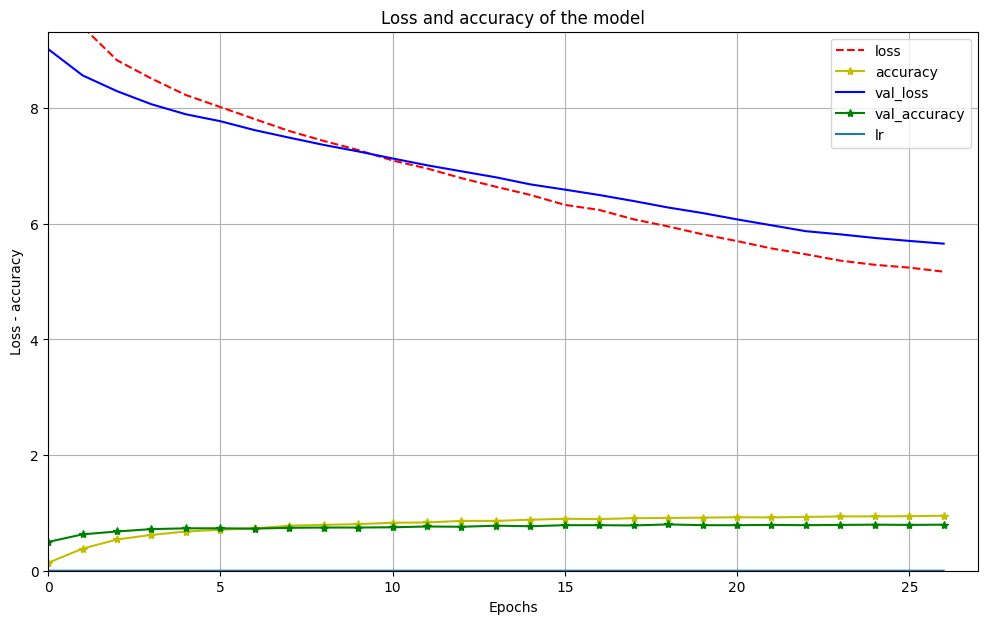

In [88]:
# entrenamos el modelo
H_FT = fine_tuned_model.fit(
      train_data_flow_aumented,
      epochs= epochs,
      batch_size= batch_size,
      validation_data=val_data_flow,
      callbacks= [lr_scheduler_val_loss, lr_scheduler_val_acc, early_stop_val_loss, early_stop_val_acc])

learning_curve(H_FT, epochs = len(H_FT.history['loss']))

In [89]:
fine_tuned_model.save(BASE_FOLDER+"Movilenet_fine_tuning_conv14_02.h5")

In [90]:
from sklearn.metrics import classification_report
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = fine_tuned_model.predict(X_test_loaded, batch_size=64)
print('\n')
print(classification_report(y_test_ohe.argmax(axis= 1), predictions.argmax(axis=1), target_names=nombre_de_clases))

[INFO]: Evaluando red neuronal...
9/9 [==============================] - 1s 64ms/step


                               precision    recall  f1-score   support

         Adho Mukha Svanasana       0.73      0.73      0.73        15
         Adho Mukha Vrksasana       0.69      0.85      0.76        13
                    Alanasana       0.00      0.00      0.00         4
                 Anjaneyasana       0.57      0.57      0.57        14
            Ardha Chandrasana       0.85      0.92      0.88        12
         Ardha Matsyendrasana       0.86      0.95      0.90        19
               Ardha Navasana       1.00      1.00      1.00         2
      Ardha Pincha Mayurasana       0.62      0.73      0.67        11
            Ashta Chandrasana       0.00      0.00      0.00         2
              Baddha Konasana       1.00      0.88      0.93        16
                     Bakasana       0.79      0.88      0.83        17
                     Balasana       0.84      1.00      0.9

c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\plane\OneDrive\Escritorio\COMPUTING SCIENCE\MASTER Inteligencia artificial\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

## Ejemplo de generación de documento PDF a partir del Colab Notebook (fichero ".ipynb")

In [ ]:
# Ejecutando los siguientes comandos en la última celda del Colab Notebook se convierte de ".ipynb" a PDF
# En caso de querer ocultar la salida de una celda puesto que no tenga relevancia se debe insertar
# el comando %%capture al inicio de la misma. Véase la celda que contiene !ls test en este Notebook.

In [ ]:
name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir='$BASE_FOLDER' '$BASE_FOLDER''$name_IPYNB_file' --to pdf"
        )





[NbConvertApp] Converting notebook /content/drive/MyDrive/07MIAR_Proyecto_Programacion/07MIAR_Proyecto_Programacion.ipynb to pdf
[NbConvertApp] Support files will be in 07MIAR_Proyecto_Programacion_files/
[NbConvertApp] Making directory ./07MIAR_Proyecto_Programacion_files
[NbConvertApp] Writing 43232 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 179055 bytes to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/07MIAR_Proyecto_Programacion.pdf
